In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib as mpl
import matplotlib.pylab
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 14
matplotlib.rc('font',family='NanumGothic')
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages
# ! python -m pip install statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [3]:
df = pd.read_excel('./unit_time_data.xls')
df = df.replace(['농업, 임업 및 어업','광업', '제조업', '전기, 가스, 증기 및 수도사업', '하수폐기처리원료재생환경복원', '건설업', '도매 및 소매업', '운수업'], ['primary', 'mining', 'manufacture', 'energy', 'recycle', 'building', 'retail', 'transportation'])
df

,industry,place,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,primary,강원도,464.603568,321.822818,447.003493,451.104407,429.786252,381.083667,397.869054,437.050625,...,545.424725,575.405768,612.267187,427.739822,498.287100,453.647254,480.894819,488.058859,681.403158,658.409402
1,mining,강원도,8794.302452,8524.970027,7108.361413,7961.915989,7356.505405,8215.906417,8170.518519,8271.489529,...,126146.690840,118439.644788,111098.348659,128608.792969,126971.602317,126801.980545,123785.674419,130903.972332,125354.602362,122025.346614
2,manufacture,강원도,166000.890632,143351.567459,180589.213645,186325.304698,189800.754558,178147.676862,177129.824152,175428.902870,...,74383.952646,66720.229573,61990.705616,69712.039636,70043.545558,71180.942686,70960.924925,70574.068848,67165.890533,64606.686131
3,energy,강원도,469349.861111,391298.166667,473932.888889,441464.361111,458378.277778,441228.611111,421594.250000,396680.000000,...,9180.907286,8348.109281,9041.798885,8162.649191,7666.069625,6088.530199,7022.175703,7516.792891,6786.157387,7992.783095
4,recycle,강원도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6923.385619,7135.661217,7038.413123,6569.078860,6538.936556,6499.154079,6326.912624,6425.835789,6656.464221,6420.298771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,energy,충청북도,298708.250000,268815.357143,291063.321429,268002.750000,271191.607143,270982.000000,277799.703704,277944.642857,...,5676.394824,5959.757212,5835.194541,5567.481146,5504.935235,5608.722530,5690.310717,6022.630653,6386.468782,5703.430163
132,recycle,충청북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14137.520969,14739.596812,14088.059552,12920.274706,13017.593180,13079.437024,13007.136257,12917.688153,13144.520325,12628.328696
133,building,충청북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4659.138117,5296.276613,5301.346378,4066.228435,3480.745265,2960.722026,2927.827928,2769.301410,3088.554936,2680.323387
134,retail,충청북도,3705.586319,3353.160000,2621.779461,2518.877647,2049.731951,1983.016554,1978.646972,2009.774431,...,2399.977730,2639.750894,2681.698501,2178.715977,2136.906456,2096.238007,2342.387787,2589.107824,3109.559264,2628.407217


In [4]:
in_d = 'primary'
pl_c = '강원도'

In [5]:
com = in_d + pl_c

In [6]:
df = df[(df.industry == in_d) & (df.place == pl_c)]
df = df.transpose()
df.columns =[com]
df = df[2:]
df

,primary강원도
2007-02,464.604
2007-03,321.823
2007-04,447.003
2007-05,451.104
2007-06,429.786
...,...
2018-06,453.647
2018-07,480.895
2018-08,488.059
2018-09,681.403


In [7]:
df[com] = pd.to_numeric(df[com])

In [8]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets

In [9]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
# best_model =None

for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        mod = sm.tsa.statespace.SARIMAX(df[[com]],
                                        order=param,
                                        seasonal_order=seasonal_param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = seasonal_param
#             best_model = results
print('Best ARIMA{}x{} - AIC:{}'.format(best_pdq, best_seasonal_pdq, best_aic))

Best ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1087.1765476673918


In [10]:
mod = sm.tsa.statespace.SARIMAX(df, 
                                order=best_pdq, 
                                seasonal_order=best_seasonal_pdq,   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

In [11]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=48)
# forecast = results.get_forecast(steps=pd.date_range('20200802', '20230802', freq='M'))
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci['mean'] = forecast_ci.mean(axis=1)
forecast_ci

,lower primary강원도,upper primary강원도,mean
2018-11-01,529.023623,637.726993,583.375308
2018-12-01,561.075269,685.898844,623.487057
2019-01-01,521.916688,661.004528,591.460608
2019-02-01,543.735622,695.755126,619.745374
2019-03-01,568.886052,732.820282,650.853167
2019-04-01,386.426955,561.466762,473.946859
2019-05-01,458.062104,643.543738,550.802921
2019-06-01,409.515964,604.882130,507.199047
2019-07-01,432.991819,637.765941,535.378880
2019-08-01,430.068888,643.837322,536.953105


In [12]:
dff = df.join(forecast_ci, how='outer')
dff

,primary강원도,lower primary강원도,upper primary강원도,mean
2007-02-01,464.603568,NaN,NaN,NaN
2007-03-01,321.822818,NaN,NaN,NaN
2007-04-01,447.003493,NaN,NaN,NaN
2007-05-01,451.104407,NaN,NaN,NaN
2007-06-01,429.786252,NaN,NaN,NaN
...,...,...,...,...
2022-06-01,NaN,178.510230,1041.770495,610.140363
2022-07-01,NaN,196.673345,1079.967047,638.320196
2022-08-01,NaN,188.453051,1091.335791,639.894421
2022-09-01,NaN,337.647509,1259.703211,798.675360


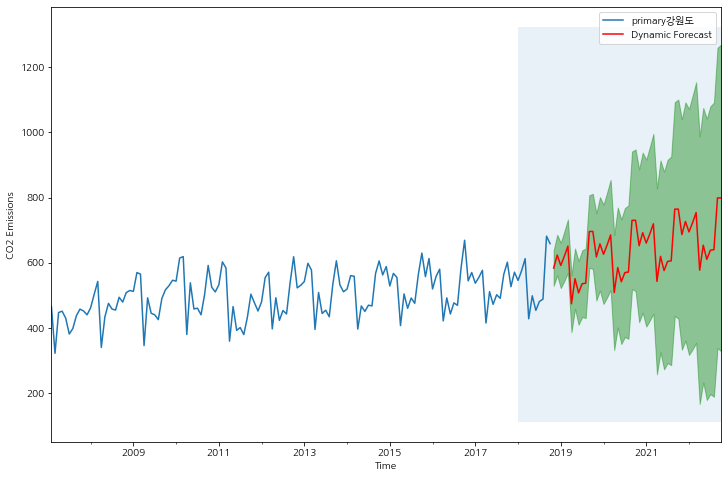

In [13]:
ax = dff[[com]].plot(label='observed',figsize=(12, 8)) 
dff['mean'].plot(label='Dynamic Forecast', color='r', ax=ax)

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2018-01-01'), 
                 dff.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

# def -----------------------------------------------------------------

In [14]:
def show_ts(industry, place):
    column = str(industry) + str(place)
    df = pd.read_excel('./unit_time_data.xls')
    df = df.replace(['농업, 임업 및 어업','광업', '제조업', '전기, 가스, 증기 및 수도사업', '하수폐기처리원료재생환경복원', '건설업', '도매 및 소매업', '운수업'], ['primary', 'mining', 'manufacture', 'energy', 'recycle', 'building', 'retail', 'transportation'])
    df = df[(df.industry == industry) & (df.place == place)]
    df = df.transpose()
    df.columns =[column]
    df = df[2:]
    df[column] = pd.to_numeric(df[column])
    p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
    pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
    pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    # best_model =None

    for param in pdq:
        for seasonal_param in pdq_x_QDQs:
            mod = sm.tsa.statespace.SARIMAX(df[[column]],
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
    mod = sm.tsa.statespace.SARIMAX(df, 
                                    order=best_pdq, 
                                    seasonal_order=best_seasonal_pdq,   
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    # Get forecast of 10 years or 120 months steps ahead in future
    forecast = results.get_forecast(steps=48)
    # forecast = results.get_forecast(steps=pd.date_range('20200802', '20230802', freq='M'))
    # Get confidence intervals of forecasts
    forecast_ci = forecast.conf_int()
    forecast_ci['mean'] = forecast_ci.mean(axis=1)
    forecast_ci
    dff = df.join(forecast_ci, how='outer')
    dff
    ax = dff[[column]].plot(label='observed',figsize=(12, 8)) 
    dff['mean'].plot(label='Dynamic Forecast', color='r', ax=ax)

    ax.fill_between(forecast_ci.index,
                    forecast_ci.iloc[:, 0],
                    forecast_ci.iloc[:, 1], color='g', alpha=.4)

    ax.fill_betweenx(ax.get_ylim(), 
                     pd.to_datetime('2018-01-01'), 
                     dff.index[-1],
                     alpha=.1, zorder=-1)

    ax.set_xlabel('Time')
    ax.set_ylabel('CO2 Emissions')

    plt.legend()
    plt.show()
    return dff

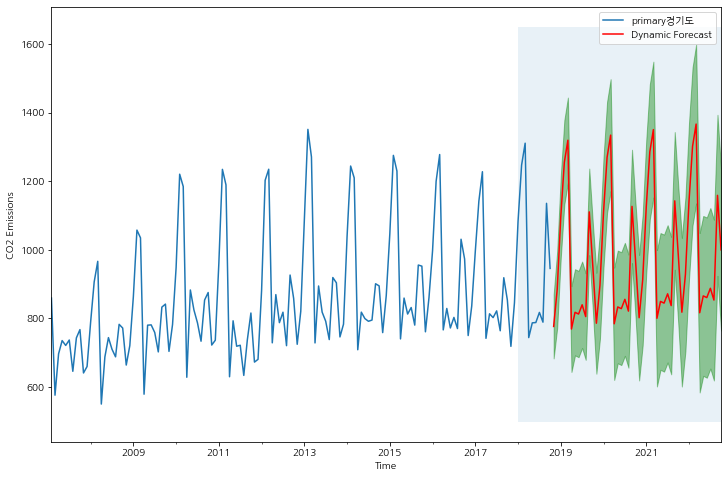

,primary경기도,lower primary경기도,upper primary경기도,mean
2007-02-01,859.361833,NaN,NaN,NaN
2007-03-01,576.230833,NaN,NaN,NaN
2007-04-01,696.740481,NaN,NaN,NaN
2007-05-01,735.453853,NaN,NaN,NaN
2007-06-01,721.338312,NaN,NaN,NaN
...,...,...,...,...
2022-06-01,NaN,627.163653,1094.510509,860.837081
2022-07-01,NaN,653.866123,1122.104710,887.985417
2022-08-01,NaN,619.092775,1088.124690,853.608733
2022-09-01,NaN,924.141310,1393.905103,1159.023206


In [15]:
show_ts('primary', '경기도')